<a href="https://colab.research.google.com/github/Ware-Hard-or-Soft/ML-DL-projects/blob/main/Associated_Rule_Mining_and_Graph_Visualization_for_Recommendation_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Associated Rule Mining and Graph Visualization
Dy David Zheng
* Association rules are used in data mining to discover interesting relationships, patterns, or correlations between items in large datasets. These rules help identify how the presence of certain items or events in a dataset influences the occurrence of others.
*The classic application of association rules is in market basket analysis, but they can be applied in various fields, such as healthcare, finance, and web usage mining.


In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import sys
import numpy as np
import pandas as pd
import sys
import collections
from itertools import combinations


In [2]:
def apriori(dataset, min_support=0.5, verbose=True):
    C1 = create_candidates(dataset)
    D = list(map(set, dataset))
    F1, support_data = get_freq(D, C1, min_support, verbose=True) # get frequent 1-itemsets
    F = [F1] # list of frequent itemsets; initialized to frequent 1-itemsets
    k = 2 # the itemset cardinality
    while (len(F[k - 2]) > 0):
        Ck = apriori_gen(F[k-2], k) # generate candidate itemsets
        Fk, supK  = get_freq(D, Ck, min_support, verbose=True) # get frequent itemsets
        support_data.update(supK)# update the support counts to reflect pruning
        F.append(Fk)  # add the frequent k-itemsets to the list of frequent itemsets
        k += 1
    if verbose:
        # Print a list of all the frequent itemsets.
        for kset in F:
            for item in kset:
                print(""                     + "{"                     + "".join(str(i) + ", " for i in iter(item)).rstrip(', ')                     + "}"                     + ":  sup = " + str(round(support_data[item], 3)))

    return F, support_data


The Apriori algorithm is a popular algorithm used in data mining for frequent itemset mining and association rule learning. It helps discover item combinations (itemsets) that frequently occur together in a dataset, commonly used in market basket analysis.

Quick Understanding of Apriori:
Purpose:
To find frequent itemsets in a dataset.
To generate association rules from these frequent itemsets (e.g., "if a customer buys bread, they are likely to buy butter").
Key Concepts:
Itemset: A set of items (e.g., {bread, butter}).
Support: The proportion of transactions in the dataset that contain a particular itemset.

How It Works:
* Step 1: Find frequent 1-itemsets (individual items) that meet a minimum support threshold.
* Step 2: Use the 1-itemsets to generate candidate 2-itemsets and keep those that meet the minimum support.
* Step 3: Repeat this process for 3-itemsets, 4-itemsets, etc., until no more frequent itemsets are found.
* The algorithm prunes out infrequent itemsets (those that don't meet the minimum support) to avoid unnecessary computation.
Efficiency: Apriori uses the property that any subset of a frequent itemset must also be frequent. This is called the Apriori principle and helps reduce the search space, making the algorithm more efficient.
Output:
Frequent Itemsets: Groups of items frequently purchased together.
Association Rules: Rules that suggest the relationship between items (e.g., "If bread is bought, butter is also likely to be bought").

In [3]:
def create_candidates(dataset, verbose=True):
    c1 = [] # list of all items in the database of transactions
    for transaction in dataset:
        for item in transaction:
            if not [item] in c1:
                c1.append([item])
    c1.sort()
    if verbose:
        # Print a list of all the candidate items.
        print(""             + "{"             + "".join(str(i[0]) + ", " for i in iter(c1)).rstrip(', ')             + "}")

    # Map c1 to a frozenset because it will be the key of a dictionary.
    return list(map(frozenset, c1))


In [4]:
def get_freq(dataset, candidates, min_support, verbose=True):
    support_data=collections.Counter()
    freq_list=[]
    candidates=list(map(frozenset, candidates))
    for t in dataset:
      for c in candidates:
        if c.issubset(t):
           support_data[c]+=1
    for key,value in support_data.items():
      if value/len(dataset)>=min_support:
        freq_list.append(key)
    print("C:",freq_list)
    return freq_list, support_data

In [5]:
def apriori_gen(freq_sets, k):
    candidate_list=[]
    ufreq_sets=[]
    for e in freq_sets:
      ufreq_sets.append(sorted(list(e)))
    ufreq_sets=sorted(ufreq_sets)
    for i,f_s in enumerate(ufreq_sets):
      for f_x in ufreq_sets[i+1:]:
        if f_s[0:k-2]==f_x[0:k-2]:
          temp=set(f_s)
          temp.update(set(f_x))
          candidate_list.append(sorted(list(temp)))
    #print("candidate",candidate_list)
    ##prune
    temp_C=candidate_list.copy()
    for ele in candidate_list:
      for ele_comb in combinations(ele,k-1):
        if frozenset(ele_comb) not in freq_sets:
          temp_C.remove(ele)
          break
    print("candidate_pruned",temp_C)
    return temp_C

In [23]:
data_internal = [
    ['milk', 'bread', 'butter'],
    ['beer', 'diapers', 'milk'],
    ['milk', 'diapers', 'beer', 'bread'],
    ['butter', 'bread'],
    ['milk', 'bread', 'diapers', 'butter'],
    ['beer', 'diapers', 'milk']
]
def loadDataSet(fileName, delim=','):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    return stringArr



def run_apriori(data_path, min_support, verbose=False):
    if data_path:
        dataset = loadDataSet(data_path)
    else:
        dataset = data_internal
    F, support = apriori(dataset, min_support=min_support, verbose=verbose)
    return F, support



def bool_transfer(input):
    ''' Transfer the input to boolean type'''
    input = str(input)
    if input.lower() in ['t', '1', 'true' ]:
        return True
    elif input.lower() in ['f', '0', 'false']:
        return False
    else:
        raise ValueError('Input must be one of {T, t, 1, True, true, F, F, 0, False, false}')

#python apriori_templete.py market_data_transaction.txt 0.5


if __name__ == '__main__':
    '''
    if len(sys.argv)==3:
        F, support = run_apriori(sys.argv[1], float(sys.argv[2]))

    elif len(sys.argv)==4:
        F, support = run_apriori(sys.argv[1], float(sys.argv[2]), bool_transfer(sys.argv[3]))
    else:
        raise ValueError('Usage: python apriori_templete.py <data_path> <min_support> <is_verbose>')
    '''
    F, support = apriori(data_internal, 0.5, True)
    print(F)
    print(support)


{beer, bread, butter, diapers, milk}
C: [frozenset({'bread'}), frozenset({'butter'}), frozenset({'milk'}), frozenset({'beer'}), frozenset({'diapers'})]
candidate_pruned [['beer', 'bread'], ['beer', 'butter'], ['beer', 'diapers'], ['beer', 'milk'], ['bread', 'butter'], ['bread', 'diapers'], ['bread', 'milk'], ['butter', 'diapers'], ['butter', 'milk'], ['diapers', 'milk']]
C: [frozenset({'bread', 'butter'}), frozenset({'bread', 'milk'}), frozenset({'beer', 'diapers'}), frozenset({'milk', 'beer'}), frozenset({'milk', 'diapers'})]
candidate_pruned [['beer', 'diapers', 'milk']]
C: [frozenset({'milk', 'beer', 'diapers'})]
candidate_pruned []
C: []
{bread}:  sup = 4
{butter}:  sup = 3
{milk}:  sup = 5
{beer}:  sup = 3
{diapers}:  sup = 4
{bread, butter}:  sup = 3
{bread, milk}:  sup = 3
{beer, diapers}:  sup = 3
{milk, beer}:  sup = 3
{milk, diapers}:  sup = 4
{milk, beer, diapers}:  sup = 3
[[frozenset({'bread'}), frozenset({'butter'}), frozenset({'milk'}), frozenset({'beer'}), frozenset({'d

frozenset({'bread', 'butter'}) 3
frozenset({'bread', 'milk'}) 3
frozenset({'milk', 'butter'}) 2
frozenset({'beer', 'diapers'}) 3
frozenset({'milk', 'beer'}) 3
frozenset({'milk', 'diapers'}) 4
frozenset({'bread', 'beer'}) 1
frozenset({'bread', 'diapers'}) 2
frozenset({'butter', 'diapers'}) 1
frozenset({'milk', 'beer', 'diapers'}) 3


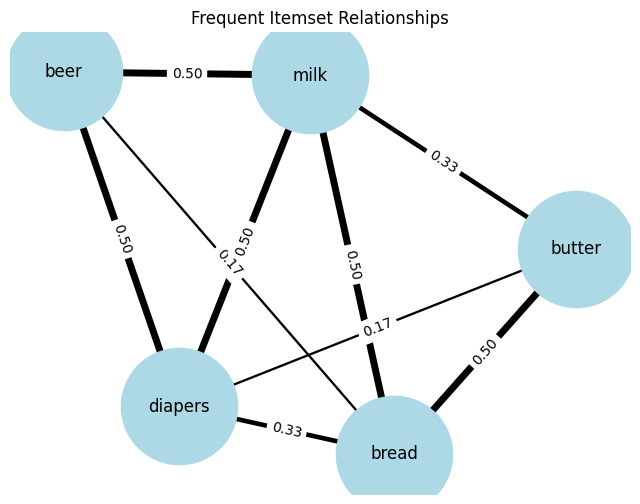

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
frequence_itemsets=[]
# Sample frequent itemsets and support values (replace this with real results from Apriori)


# Create a graph
G = nx.Graph()
print
# Add nodes and edges
for itemset, sup in support.items():
   if len(itemset) == 1:
       continue
   print(itemset, sup)
   itemset_list = list(itemset)
   for i, item in enumerate(itemset_list):
        for other_item in itemset_list[i + 1:]:
            G.add_edge(item, other_item, weight=sup/len(data_internal))
# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
plt.figure(figsize=(8, 6))

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Draw edges with thickness proportional to support
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, width=[v * 10 for v in edges.values()])
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edges.items()})

# Show the plot
plt.title("Frequent Itemset Relationships")
plt.axis("off")
plt.show()